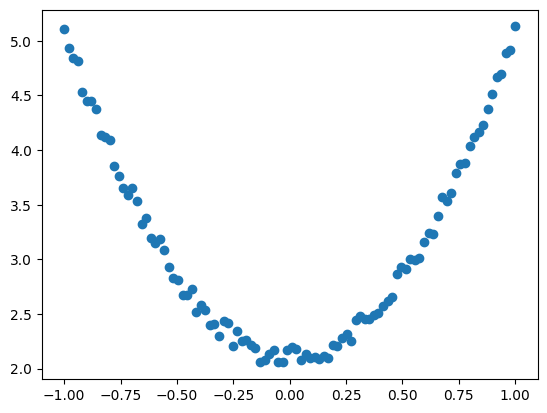









































[[0.79646442284302665]]
4.7428952912163886
[[1.3787470439334337]]
0.64948342415958782
[[1.6369864875158668]]
0.20554498380649963
[[1.7858066561238355]]
0.13942041008371572
[[1.8943733600850252]]
0.11515311305397349
[[1.985244125280597]]
0.097828284253775918
[[2.0660208590544449]]
0.083464609409370463
[[2.139487014024013]]
0.071312902670223111
[[2.206855683495212]]
0.06100702816136841
[[2.2688117580757816]]
0.052263984395082994
[[2.3258476097053387]]
0.044846507621457407
[[2.3783724180145827]]
0.038553595894262292
[[2.42674887541688]]
0.033214750870256431
[[2.4713065059864334]]
0.028685326456132674
[[2.5123473728700185]]
0.024842606618874809
[[2.5501492347715429]]
0.021582480295672012
[[2.5849677807875904]]
0.01881662067161392
[[2.6170384735363932]]
0.0164700921320131
[[2.6465781778825095]]
0.01447932002656147
[[2.6737866390488865]]
0.012790368237157792


KeyboardInterrupt: 

In [22]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(100)
x0 = np.linspace(-1,1,100).reshape(100,1)
y0 = 3*np.power(x0,2) +2+0.2*np.random.rand(x0.size).reshape(100,1)

plt.scatter(x0,y0)
plt.show()

x = tf.constant(x0)
y = tf.constant(y0)

w0 = np.random.rand(1,1)  #初始化随机权重
b0 = np.random.rand(1,1)  #初始化随机偏置

class LinearRegression:
    #定义构建函数，初始化权重函数
    def __init__(self,**args):
        #super().__init__(*args)
        self.w = tf.Variable(w0)
        self.b = tf.Variable(b0)
    #call函数，单层神经网络，正向传播
    def __call__(self,x):
        y1 = tf.square(x)*self.w + self.b
        return y1
        
mymodel = LinearRegression()

#自定义损失函数  
def myloss(x,y):
    mse = tf.reduce_mean(tf.square(y - mymodel(x)))  #MSE平方差误差
    return mse
#自动微分
lr = 0.001

'''@tf.function
def train_step(x,y,model,epoch):
    for i in range(epoch):
        with tf.GradientTape() as tape:
            loss = myloss(x,y)
        #反向传播求梯度
        w = model.w
        b = model.b
        dw,db = tape.gradient(loss,[w,b])
        #梯度下降法更新参数
        w.assign(w - lr*dw)
        b.assign(b - lr*db)
        if(i%50==0):
            tf.print(w)
            tf.print(loss)
            tf,print()
    return w,b

train_step(x,y,mymodel,1000)

plt.scatter(x,y,c='b')
plt.scatter(x,mymodel(x),c='r')
plt.show()
'''


#SGD
optimizer = tf.keras.optimizers.SGD(learning_rate= 0.01)
@tf.function

def train_step01(x,y,model,epoch):
    for i in range(epoch):
        with tf.GradientTape() as tape:
            loss = myloss(x,y)
        w = model.w
        b = model.b
        dw,db = tape.gradient(loss,[w,b])
        #自动更新梯度参数
        optimizer.apply_gradients(grads_and_vars = zip([dw,db],[w,b]))
        if(i%50==0):
            tf.print(w)
            tf.print(loss)
            tf,print()
    return w,b

train_step01(x,y,mymodel,1000)
plt.scatter(x,y,c='b')
plt.scatter(x,mymodel(x),c='r')
plt.show() 


In [11]:

import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
# tf,data
#从numpy中导入数据
data_set_1 = tf.data.Dataset.from_tensor_slices(np.array([1,2,3,4,5,6,7,8,9,10]))
data_set_2 = tf.data.Dataset.from_tensor_slices(tf.constant([1,2,3,4]))

#从生成器中导入数据
def generator():
    for i in range(10):
        yield i    
data_set_3 = tf.data.Dataset.from_generator(generator,output_types=tf.int32,output_shapes=([]))

#从文本中导入数据
data_set_4 = tf.data.TextLineDataset('test.txt')

#读取tfrecord文件
data_set_5 = tf.data.TFRecordDataset('test.tfrecord')

#从csv文件中导入数据
data_set_6 = tf.data.experimental.make_csv_dataset('test.csv',batch_size=3,label_name='label',shuffle=True)


ValueError: No files match `file_pattern` test.csv.

In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os

data_dir = "D:/tensor_data"
train_people_dir = os.path.join(data_dir, 'train')
train_tfrecord_file =os.path.join(data_dir, 'train', 'train.tfrecord')

test_people_dir = os.path.join(data_dir, 'test')
test_tfrecord_file = os.path.join(data_dir, 'test', 'test.tfrecord')

def get_filenames_and_labels(dir,label):# -> tuple[list, list]:
    filenames = [os.path.join(dir, filename) for filename in os.listdir(dir)] #生成一个包含指定目录下所有文件的完整路径的列表
    labels = [label for _ in range(len(filenames))]
    return filenames, labels    

train_people_filenames, train_people_labels = get_filenames_and_labels(train_people_dir, 0)
test_people_filenames, test_people_labels = get_filenames_and_labels(test_people_dir, 0)

#数据转换为tfrecord格式
def encoder(filenames,labels,tfrecord_file):
    with tf.io.TFRecordWriter(tfrecord_file) as writer: #创建一个TFRecordWriter对象，用于将数据写入TFRecord文件
        for filename, label in zip(filenames, labels): #遍历文件名和标签列表
            image = open(filename,'rb').read() #以二进制模式打开文件并读取文件内容
            
            feature = {
                'image':tf.train.Feature(bytes_list = tf.train.BytesList(value = [image])) , #将图像数据存储为字节列表
                'label':tf.train.Feature(int64_list = tf.train.Int64List(value = [label])) #将标签数据存储为整数列表
            }
            
            example = tf.train.Example(features = tf.train.Features(feature = feature)) #创建一个Example对象，包含了一个样本的特征
            writer.write(example.SerializeToString()) #
            
    encoder(train_people_filenames,train_people_labels,train_tfrecord_file)
    encoder(test_people_filenames,test_people_labels,test_tfrecord_file)
                
#
def decoder(tfrecord_file,is_train_dataset = None):
    dataset = tf.data.TFRecordDataset(tfrecord_file) #创建一个TFRecordDataset对象，用于读取TFRecord文件中的数据
    feature_discription = {
        'image':tf.io.FixedLenFeature([],tf.string, default_value=b''), #定义了图像数据的特征描述，指定了特征的类型和形状
        'label':tf.io.FixedLenFeature([],tf.int64) #定义了标签数据的特征描述，指定了特征的类型和形状 
    }
    
    def _parse_example(example_proto): #定义了一个内部函数_parse_example，用于解析从TFRecord文件中读取的每个样本
        parsed_example = tf.io.parse_single_example(example_proto,feature_discription) #使用tf.io.parse_single_example函数解析从TFRecord文件中读取的单个样本，并根据特征描述解析出对应的特征值
        image = tf.image.decode_jpeg(parsed_example['image'],channels = 3) #使用tf.image.decode_jpeg函数将图像数据解析为张量，并指定通道数为3
        image = tf.image.resize(image,[224,224]) #使用tf.image.resize函数将图像数据调整为指定的大小
        image = image/255.0 #将图像数据进行归一化处理，将像素值缩放到[0,1]的范围内
        label = tf.cast(parsed_example['label'],tf.int32) #使用tf.cast函数将标签数据转换为整数类型
        return image,label #返回解析后的图像数据和标签数据
            
    dataset = dataset.map(_parse_example) #使用map函数将解析函数应用到数据集的每个样本上，实现数据的解析和转换
    if is_train_dataset:
        dataset = dataset.shuffle(buffer_size = 1000) #使用shuffle函数对数据集进行随机打乱，指定缓冲区大小为1000
    dataset = dataset.batch(32) #使用batch函数将数据集划分为批次，每个批次包含32个样本
    dataset = dataset.repeat() #使用repeat函数使数据集重复多次，以便在训练过程中重复使用
    return dataset #返回经过处理的数据集

train_dataset = decoder(train_tfrecord_file,is_train_dataset = True)
test_dataset = decoder(test_tfrecord_file)

i = 1
for image,label in train_dataset:
    print(image.shape)
    print(label.shape)
    plt.imshow(image[0].numpy())
    plt.show()
    i = i + 1
    if i == 10:
        break
    
plt.show()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd5 in position 197: invalid continuation byte

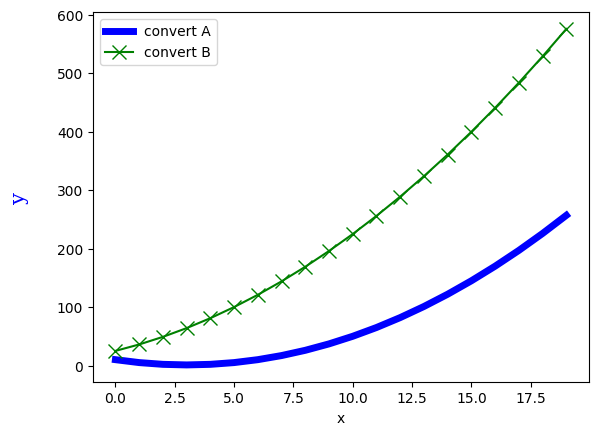

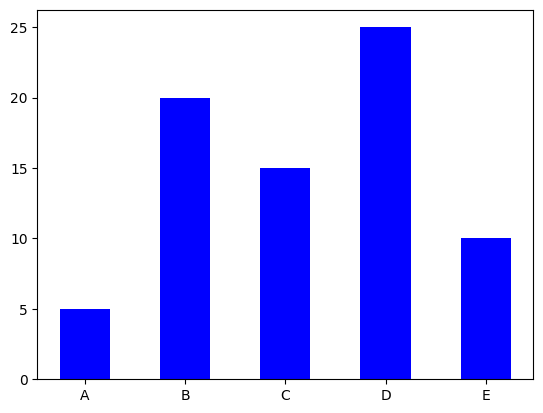

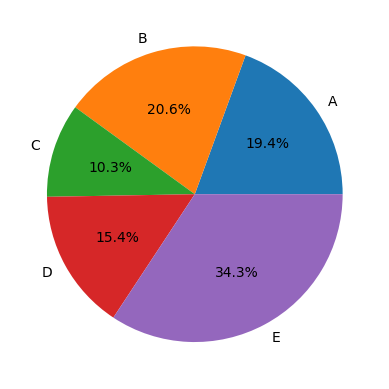

In [2]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
x = np.arange(0,20,1)
y1 = (x-3)**2 +1
y2 = (x+5)**2
#折线图
plt.plot(x,y1,linestyle ='-',color = 'b',linewidth=5.0,label = 'convert A')
plt.plot(x,y2,marker ='x',color = 'g',markersize=10,label = 'convert B')
#x y label
plt.xlabel('x',size = 10)
plt.ylabel('y',size = 15,rotation = 90,labelpad = 20,color = 'b',fontdict = {'family':'serif','color':'r','size':20})
#lim

plt.legend(labels = ['convert A','convert B'],loc = 'best',fontsize = 10)
plt.show()


#柱状图
age = [5,20,15,25,10]
label = ['A','B','C','D','E']
plt.bar(label,age,width = 0.5,color = 'b')
plt.show()

#饼图
income = [1888,2000,1000,1500,3333]
label_1 = ['A','B','C','D','E']
plt.pie(income,labels=label_1,autopct='%1.1f%%') 
plt.show()

In [ ]:
#pyecharts
from pyecharts.charts import Bar
from pyecharts import options as opts
bar = (
    Bar()
    .add_xaxis(["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"])
    .add_yaxis("商家A", [5, 20, 36, 10, 75, 90])
    .add_yaxis("商家B",[4,19,35,5,60,80])
    .set_global_opts(title_opts=opts.TitleOpts(title="商品", subtitle="销售金额"))
)
bar.render_notebook()

from pyecharts import options as opts
from pyecharts.charts import Gauge
#仪表盘Gauge
dashboard =(
    Gauge()
    .add(
        series_name = '当前车速',
        data_pair = [("",88)],min_=0,max_=260,split_number = 26,
        
        #显示格式
        detail_label_opts = opts.LabelOpts(
            font_size = 20,
            color = 'green',
            formatter = '{value}km/h',
            position = 'inside',
            is_show = True,
        ),
        #坐标轴线条样式
        axisline_opts = opts.AxisLineOpts(
            is_show = True,
            linestyle_opts = opts.LineStyleOpts(
                color = [[0.2,'green'],[0.8,'red'],[1,'pink']],width = 3
            )
        ),
    
    )
    .set_global_opts( #全局配置
        title_opts = opts.TitleOpts(
            title = '仪表盘',
            subtitle = '车速',
            pos_left = 'center',
            pos_top = 'top',
            title_textstyle_opts = opts.TextStyleOpts(
                font_size = 20,
            )
        )
    )
)

dashboard.render_notebook()

In [ ]:
#Tensorboard
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import os
import datetime

# 导入Fashion MNIST 数据集
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
x_train,x_test = x_train/255.0,x_test/255.0

#构建模型
def create_model():
    return tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10,activation='softmax')
    ])
    
#训练模型
def train_model():
    model = create_model()
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    log_dir = os.path.join("logs",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1)
    model.fit(x=x_train,
              y=y_train,
              epochs=5,
              validation_data=(x_test,y_test),
              callbacks=[tensorboard_callback])

train_model()    

4358144/4422102 [============================>.] - ETA: 0s

In [11]:
#数据预处理
    #处理缺失值
import pandas as pd
from io import StringIO
import numpy as np
from sklearn.impute import SimpleImputer  #导入sklearn.impute.SimpleImputer类
csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''
df = pd.read_csv(StringIO(csv_data))
print(df)
print(df.isnull().sum())
#用平均值填补缺失值
imr = SimpleImputer(missing_values=np.nan,strategy='mean') #实例化
imr = imr.fit(df)  #fit拟合
imputed_data = imr.transform(df.values) #transform转换
print(imputed_data)

      A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN
A    0
B    0
C    1
D    1
dtype: int64
[[ 1.   2.   3.   4. ]
 [ 5.   6.   7.5  8. ]
 [10.  11.  12.   6. ]]


d:\anaconda3\envs\tf_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [7]:
import pandas as pd
from io import StringIO
import numpy as np
df = pd.DataFrame([
    ['green','M',10.1,'class1'],
    ['red','L',13.5,'class2'],
    ['blue','XL',15.3,'class1']
],columns = ['颜色','型号','价格','类别'])

print(df)
#有序特征变数值
size_mapping = {'XL':3,
                'L':2,
                'M':1}
df['型号'] = df['型号'].map(size_mapping)

#无序特征变独热编码
pd.get_dummies(df[['价格','颜色','型号','类别']])   


      颜色  型号    价格      类别
0  green   M  10.1  class1
1    red   L  13.5  class2
2   blue  XL  15.3  class1


,价格,型号,颜色_blue,颜色_green,颜色_red,类别_class1,类别_class2
0,10.1,1,False,True,False,True,False
1,13.5,2,False,False,True,False,True
2,15.3,3,True,False,False,True,False


   类别     酒精   苹果酸     灰  灰的碱性    镁    总酚    黄酮  非黄烷类酚类   花青素  颜色强度    色调  \
0   1  14.23  1.71  2.43  15.6  127  2.80  3.06    0.28  2.29  5.64  1.04   
1   1  13.20  1.78  2.14  11.2  100  2.65  2.76    0.26  1.28  4.38  1.05   
2   1  13.16  2.36  2.67  18.6  101  2.80  3.24    0.30  2.81  5.68  1.03   
3   1  14.37  1.95  2.50  16.8  113  3.85  3.49    0.24  2.18  7.80  0.86   
4   1  13.24  2.59  2.87  21.0  118  2.80  2.69    0.39  1.82  4.32  1.04   

   od280/od315稀释葡萄酒   脯氨酸  
0              3.92  1065  
1              3.40  1050  
2              3.17  1185  
3              3.45  1480  
4              2.93   735  
训练准确率： 0.9838709677419355
测试准确率： 0.9814814814814815


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

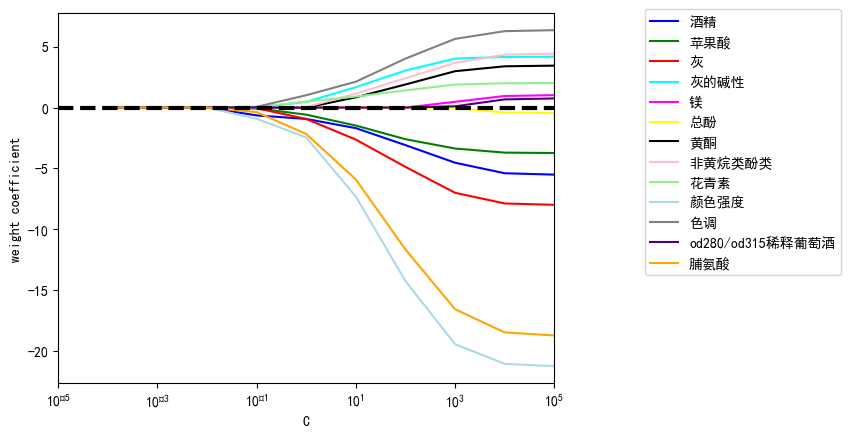

In [ ]:
import pandas as pd
from io import StringIO
import numpy as np
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)
df_wine.columns = ['类别','酒精','苹果酸','灰','灰的碱性','镁','总酚','黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']

print(df_wine.head())


#分割数据集
from sklearn.model_selection import train_test_split
x,y = df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values
x = df_wine.iloc[:,1:].values
y = df_wine.iloc[:,0].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

#数据标准化处理
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
x_train_std = stdsc.fit_transform(x_train)
x_test_std = stdsc.transform(x_test)


#逻辑回归进行训练
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1',C=0.1,solver='liblinear')
lr.fit(x_train_std,y_train) #训练
print('训练准确率：',lr.score(x_train_std,y_train)) #准确率
print('测试准确率：',lr.score(x_test_std,y_test)) 

import matplotlib.pyplot as plt
%matplotlib inline
#设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure() #创建画布
ax = plt.subplot(111) #创建子图
colors = ['blue','green','red','cyan','magenta','yellow','black','pink','lightgreen','lightblue','gray','indigo','orange']
weights = []
params = []

for c in np.logspace(-4,5,num = 10):
    lr = LogisticRegression(penalty='l1',C=c,solver='liblinear',random_state=0)  #lasso回归
    lr.fit(x_train_std,y_train)
    weights.append(lr.coef_[1])  #获取权重
    params.append(c)  

weights = np.array(weights)

for column,color in zip(range(weights.shape[1]),colors):
    plt.plot(params,weights[:,column],label=df_wine.columns[column+1],color=color)

plt.axhline(0,color='black',linestyle='--',linewidth=3)  #添加水平参考线
plt.xlim([10**(-5),10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')      #设置x轴刻度类型
plt.legend(loc='upper left')  #显示图例
ax.legend(loc='upper center',bbox_to_anchor=(1.38,1.03),ncol=1,fancybox=True)  

In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras import layers
#按层顺序构建模型
model =tf.keras.Sequential() 
model.add(layers.Dense(units=64,activation='relu'))
model.add(layers.Dense(units=32,activation='relu'))
model.add(layers.Dense(units=10,activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])  

#使用函数式API构建模型 
inputs = tf.keras.Input(shape=(3,), name='my_input') #每一输入样本有三个特征
hidden1 = layers.Dense(64, activation='relu')(inputs)
hidden2 = layers.Dense(64, activation='relu')(inputs)
concat = layers.Concatenate()([hidden1, hidden2]) #将两个特征维度相加
output = layers.Dense(10,name = "output" ,activation='softmax')(concat)
model = tf.keras.Model(inputs=inputs, outputs=output)

#使用子类化API构建模型
class my_model(tf.keras.Model):
    def __init__(self):
        super(my_model,self).__init__()
        self.dense1 = layers.Dense(64,activation='relu')
        self.dense2 = layers.Dense(64,activation='relu')
        
    def call(self,inputs): #构建网络结构
        x = self.dense1(inputs)
        return self.dense2(x)
    

(60000, 28, 28) (10000, 28, 28)


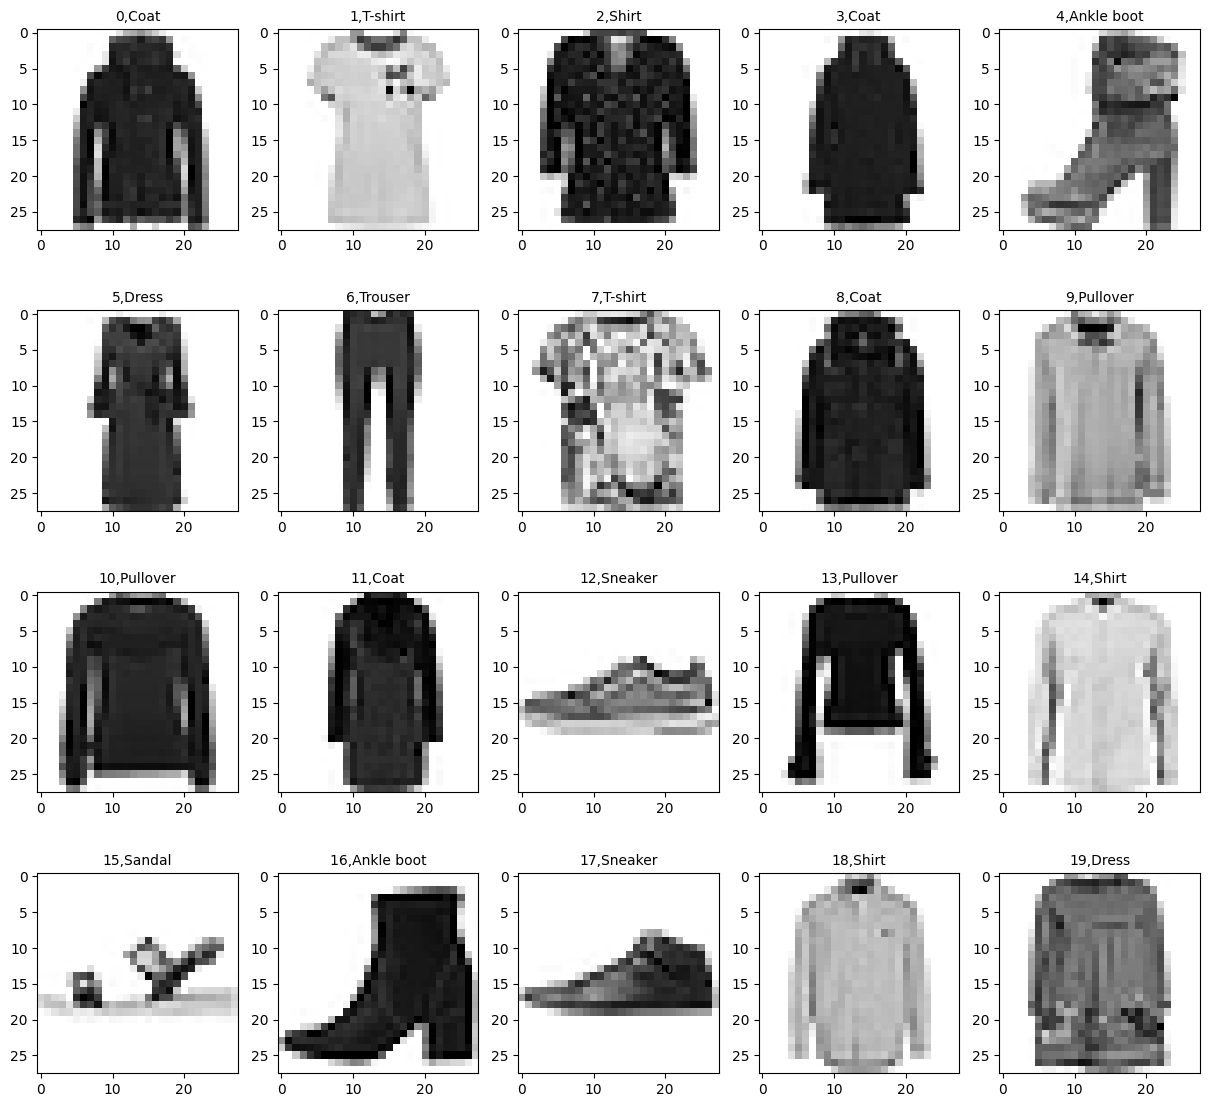

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 3000)              2355000   
                                                                 
 dense_13 (Dense)            (None, 100)               300100    
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
Total params: 2656110 (10.13 MB)
Trainable params: 2656110 (10.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
235/235 [==============================] - 6s 22ms/step - loss: 0.5110 - accuracy: 0.8187
Epoch 2/10
235/235 [=========================

In [6]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from tensorflow import keras
import os
import math
import pickle as p
import gzip
import time

 #加载数据函数
 
def load_data(input_path):
    files = [
        'train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz',
        't10k-labels-idx1-ubyte.gz', 't10k-images-idx3-ubyte.gz'       
    ]
    
    paths = []
    for fname in files:
        paths.append(os.path.join(input_path,fname))
        
    with gzip.open(paths[0], 'rb') as lbpath:
        y_train = np.frombuffer(lbpath.read(), np.uint8, offset=8)  #将读取的二进制数据转换为NumPy数组

    with gzip.open(paths[1], 'rb') as imgpath:
        x_train = np.frombuffer(imgpath.read(), np.uint8, offset=16).reshape(len(y_train), 28, 28)
    
    with gzip.open(paths[2], 'rb') as lbpath:
        y_test = np.frombuffer(lbpath.read(), np.uint8, offset=8)   #offset=8 表示从文件的第8个字节开始读取数据
    
    with gzip.open(paths[3], 'rb') as imgpath:
        x_test = np.frombuffer(imgpath.read(),np.uint8,offset =16).reshape(len(y_test),28,28)
        
    return (x_train,y_train),(x_test,y_test)

data_dir ='D:/tensor_data/fashion mnist'
(x_train,y_train),(x_test,y_test) = load_data(data_dir)
print(x_train.shape,x_test.shape)

label_dict = {
    0:'T-shirt',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle boot'
}

def plot_image_labels(images,labels,num):
    total =len(images)
    fig = plt.gcf()
    fig.set_size_inches(15,math.ceil(num/10)*7)
    for i in range(0,num):
        choose_n = np.random.randint(0,total)
        ax = plt.subplot(math.ceil(num/5),5,i+1)
        ax.imshow(images[choose_n],cmap = 'binary')
        title = str(i)+','+label_dict[labels[choose_n]]
        ax.set_title(title,fontsize =10)
        #ax.set_xticks([]) #去掉x轴刻度
        #ax.set_yticks([]) #去掉y轴刻度
        index = i+1
    plt.show()

plot_image_labels(x_train,y_train,20)


# 数据归一化
x_train = x_train.astype('float32') /255.0
x_test = x_test.astype('float32') /255.0

#构建模型
se_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #将输入的二维图像数据展平为一维数组
    keras.layers.Dense(3000,activation='relu'), #全连接层
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

se_model.summary()


#训练模型
se_model.compile(optimizer='adam',
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])
se_model.fit(x_train,y_train,epochs=10,batch_size=256)

(60000, 28, 28) (10000, 28, 28)


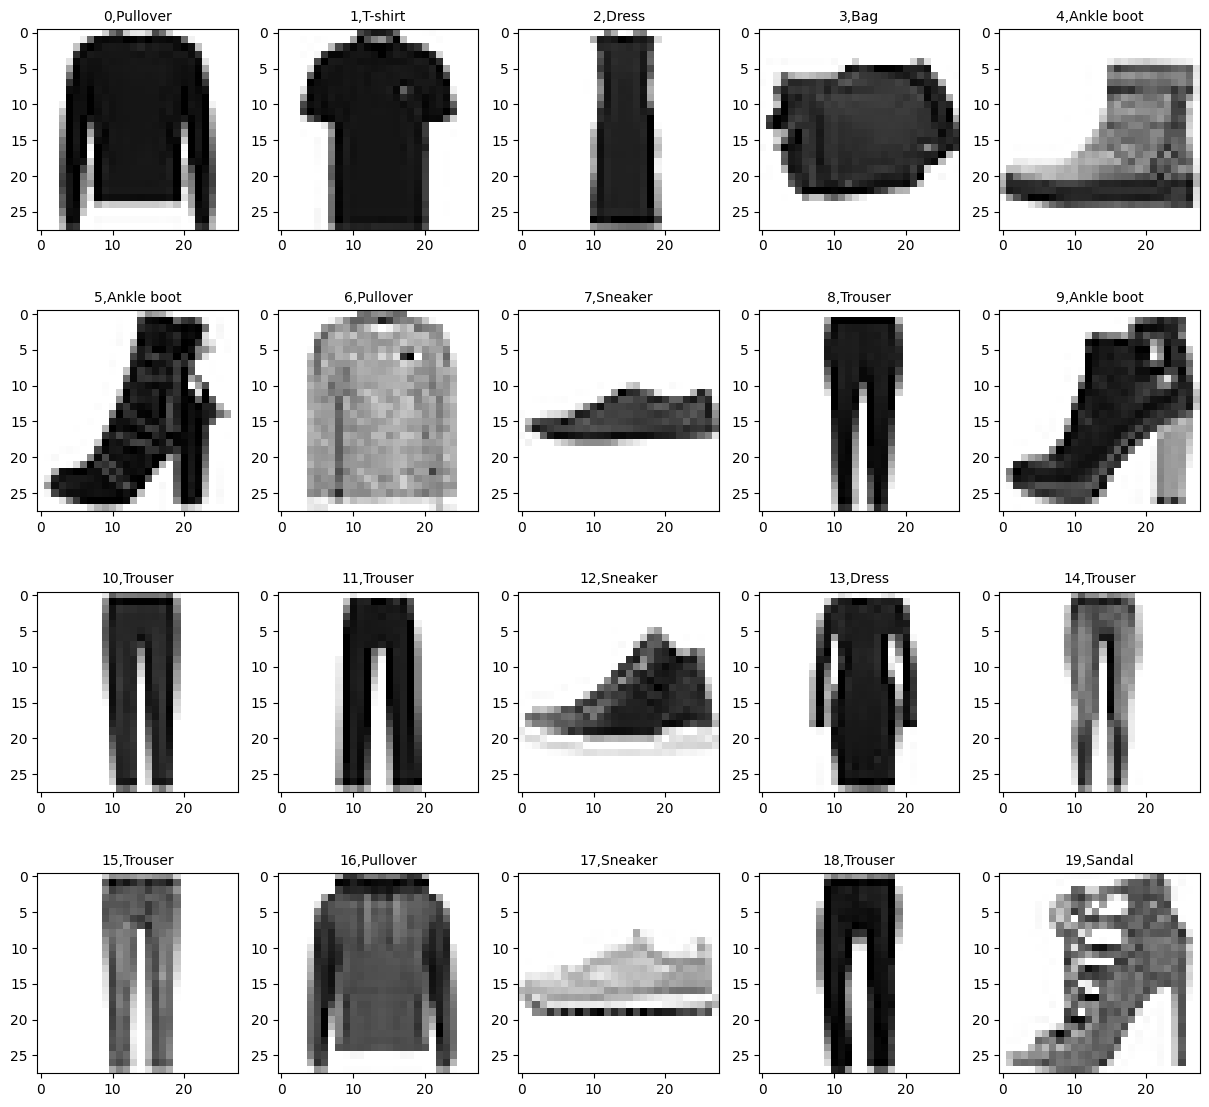

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 28, 28)]             0         []                            
                                                                                                  
 flatten_10 (Flatten)        (None, 784)                  0         ['input_6[0][0]']             
                                                                                                  
 dense_28 (Dense)            (None, 300)                  235500    ['flatten_10[0][0]']          
                                                                                                  
 dense_29 (Dense)            (None, 100)                  30100     ['dense_28[0][0]']            
                                                                                            

In [13]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from tensorflow import keras
import os
import math
import pickle as p
import gzip
import time

 #加载数据函数
 
def load_data(input_path):
    files = [
        'train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz',
        't10k-labels-idx1-ubyte.gz', 't10k-images-idx3-ubyte.gz'       
    ]
    
    paths = []
    for fname in files:
        paths.append(os.path.join(input_path,fname))
        
    with gzip.open(paths[0], 'rb') as lbpath:
        y_train = np.frombuffer(lbpath.read(), np.uint8, offset=8)  #将读取的二进制数据转换为NumPy数组

    with gzip.open(paths[1], 'rb') as imgpath:
        x_train = np.frombuffer(imgpath.read(), np.uint8, offset=16).reshape(len(y_train), 28, 28)
    
    with gzip.open(paths[2], 'rb') as lbpath:
        y_test = np.frombuffer(lbpath.read(), np.uint8, offset=8)   #offset=8 表示从文件的第8个字节开始读取数据
    
    with gzip.open(paths[3], 'rb') as imgpath:
        x_test = np.frombuffer(imgpath.read(),np.uint8,offset =16).reshape(len(y_test),28,28)
        
    return (x_train,y_train),(x_test,y_test)

data_dir ='D:/tensor_data/fashion mnist'
(x_train,y_train),(x_test,y_test) = load_data(data_dir)
print(x_train.shape,x_test.shape)

label_dict = {
    0:'T-shirt',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle boot'
}

def plot_image_labels(images,labels,num):
    total =len(images)
    fig = plt.gcf()
    fig.set_size_inches(15,math.ceil(num/10)*7)
    for i in range(0,num):
        choose_n = np.random.randint(0,total)
        ax = plt.subplot(math.ceil(num/5),5,i+1)
        ax.imshow(images[choose_n],cmap = 'binary')
        title = str(i)+','+label_dict[labels[choose_n]]
        ax.set_title(title,fontsize =10)
        #ax.set_xticks([]) #去掉x轴刻度
        #ax.set_yticks([]) #去掉y轴刻度
        index = i+1
    plt.show()

plot_image_labels(x_train,y_train,20)


# 数据归一化
x_train = x_train.astype('float32') /255.0
x_test = x_test.astype('float32') /255.0

#functional api构建模型
input =keras.Input(shape=(28,28))
x = keras.layers.Flatten()(input)
hidden1 = keras.layers.Dense(units=300,activation='relu')(x)
hidden2 = keras.layers.Dense(units=100,activation='relu')(hidden1)
concat = keras.layers.Concatenate()([x,hidden2])
output = keras.layers.Dense(units=10,activation='softmax')(concat)
se_model = keras.Model(inputs=input,outputs=output)
se_model.summary()




#训练模型
se_model.compile(optimizer='adam',
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])
se_model.fit(x_train,y_train,epochs=10,batch_size=256)
keras.utils.plot_model(se_model, show_shapes=True, to_file='model.png')


#测试模型
test_loss,test_acc = se_model.evaluate(x_test,y_test)
print(test_loss,test_acc)

#保存模型
checkpoint = keras.callbacks.ModelCheckpoint('model.h5',save_best_only=True) #回调函数 保存参数
histroy = se_model.fit(x_train,y_train,epochs=10,batch_size=256,callbacks=[checkpoint])
se_model_ck = keras.models.load_model('model.h5')  #恢复模型

def get_logdir():
    root_logdir = os.path.join(os.curdir, "my_logs")
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

logdir = get_logdir()

tensorboard_cb = keras.callbacks.TensorBoard(log_dir=logdir)
se_model.fit(x_train,y_train,epochs=10,batch_size=256,callbacks=[tensorboard_cb])

#tensorboard --logdir=my_logs

(60000, 28, 28) (10000, 28, 28)


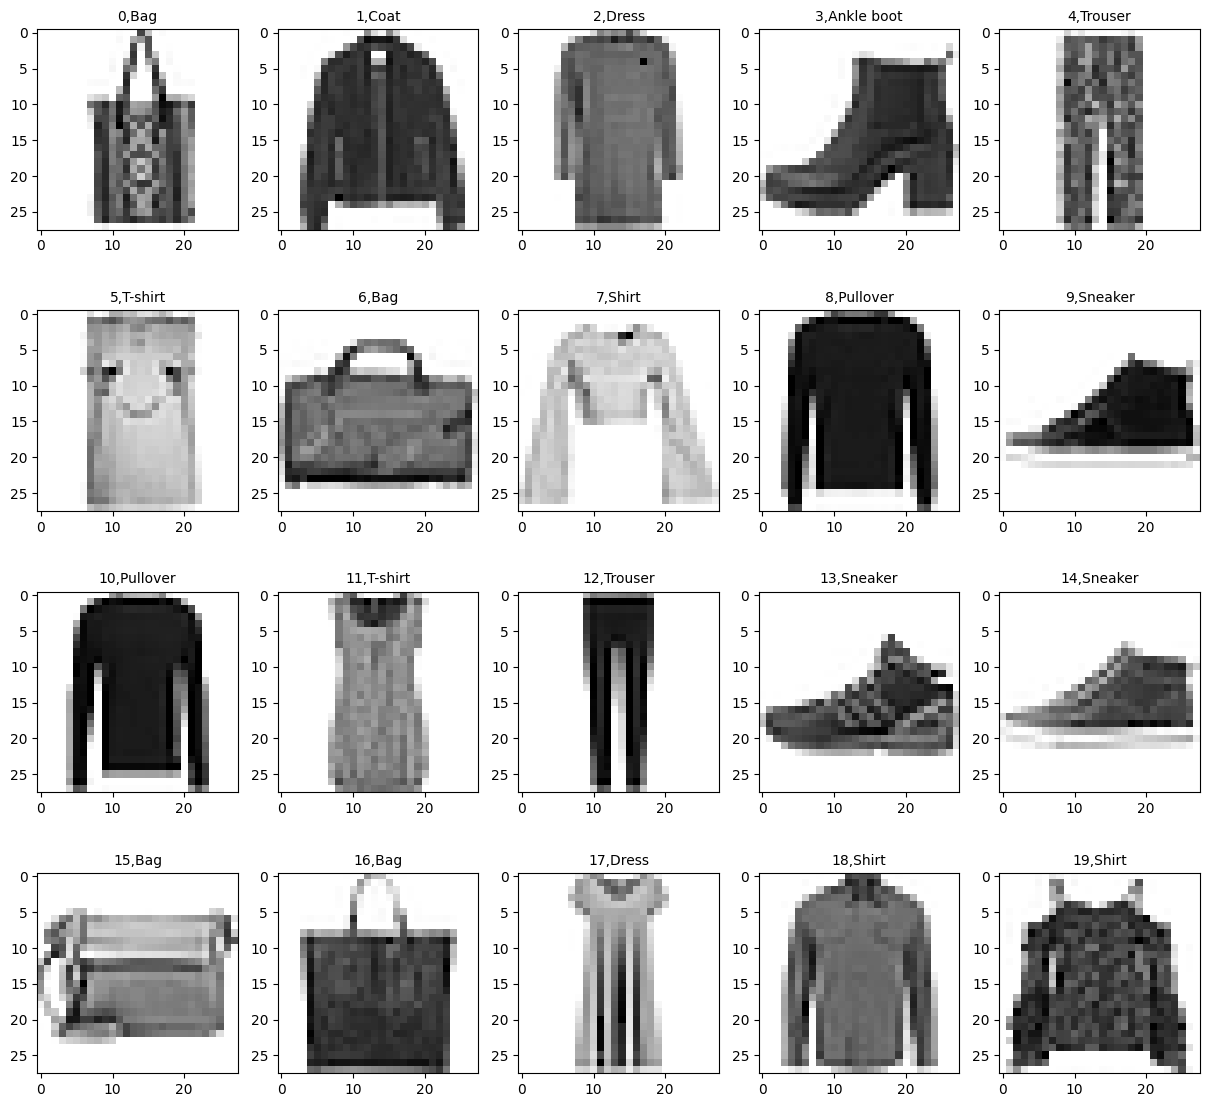

Epoch 1/10
235/235 [==============================] - 1s 2ms/step - loss: 0.6578 - accuracy: 0.7722
Epoch 2/10
235/235 [==============================] - 0s 2ms/step - loss: 0.4456 - accuracy: 0.8451
Epoch 3/10
235/235 [==============================] - 0s 2ms/step - loss: 0.3962 - accuracy: 0.8610
Epoch 4/10
235/235 [==============================] - 0s 2ms/step - loss: 0.3719 - accuracy: 0.8666
Epoch 5/10
235/235 [==============================] - 0s 2ms/step - loss: 0.3508 - accuracy: 0.8750
Epoch 6/10
235/235 [==============================] - 0s 2ms/step - loss: 0.3361 - accuracy: 0.8796
Epoch 7/10
235/235 [==============================] - 0s 2ms/step - loss: 0.3258 - accuracy: 0.8814
Epoch 8/10
235/235 [==============================] - 0s 2ms/step - loss: 0.3122 - accuracy: 0.8876
Epoch 9/10
235/235 [==============================] - 0s 2ms/step - loss: 0.3028 - accuracy: 0.8898
Epoch 10/10
235/235 [==============================] - 0s 2ms/step - loss: 0.2969 - accuracy: 0.8921

In [15]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from tensorflow import keras
import os
import math
import pickle as p
import gzip
import time

 #加载数据函数
 
def load_data(input_path):
    files = [
        'train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz',
        't10k-labels-idx1-ubyte.gz', 't10k-images-idx3-ubyte.gz'       
    ]
    
    paths = []
    for fname in files:
        paths.append(os.path.join(input_path,fname))
        
    with gzip.open(paths[0], 'rb') as lbpath:
        y_train = np.frombuffer(lbpath.read(), np.uint8, offset=8)  #将读取的二进制数据转换为NumPy数组

    with gzip.open(paths[1], 'rb') as imgpath:
        x_train = np.frombuffer(imgpath.read(), np.uint8, offset=16).reshape(len(y_train), 28, 28)
    
    with gzip.open(paths[2], 'rb') as lbpath:
        y_test = np.frombuffer(lbpath.read(), np.uint8, offset=8)   #offset=8 表示从文件的第8个字节开始读取数据
    
    with gzip.open(paths[3], 'rb') as imgpath:
        x_test = np.frombuffer(imgpath.read(),np.uint8,offset =16).reshape(len(y_test),28,28)
        
    return (x_train,y_train),(x_test,y_test)

data_dir ='D:/tensor_data/fashion mnist'
(x_train,y_train),(x_test,y_test) = load_data(data_dir)
print(x_train.shape,x_test.shape)

label_dict = {
    0:'T-shirt',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle boot'
}

def plot_image_labels(images,labels,num):
    total =len(images)
    fig = plt.gcf()
    fig.set_size_inches(15,math.ceil(num/10)*7)
    for i in range(0,num):
        choose_n = np.random.randint(0,total)
        ax = plt.subplot(math.ceil(num/5),5,i+1)
        ax.imshow(images[choose_n],cmap = 'binary')
        title = str(i)+','+label_dict[labels[choose_n]]
        ax.set_title(title,fontsize =10)
        #ax.set_xticks([]) #去掉x轴刻度
        #ax.set_yticks([]) #去掉y轴刻度
        index = i+1
    plt.show()

plot_image_labels(x_train,y_train,20)


# 数据归一化
x_train = x_train.astype('float32') /255.0
x_test = x_test.astype('float32') /255.0

#subclassing api构建模型
class SE_model(tf.keras.Model):
    def __init__(self, **kwargs):
        super(SE_model, self).__init__(**kwargs)
        self.layer_1 = keras.layers.Flatten()
        self.layer_2 = keras.layers.Dense(128,activation = 'relu')
        self.layer_3 = keras.layers.Dense(10,activation = 'softmax')
        self.layer_4 = keras.layers.Dropout(0.2)
        

    def call(self,inputs):
        x = self.layer_1(inputs)
        x = self.layer_2(x)
        x = self.layer_4(x)
        x = self.layer_3(x)
        return x

se_model = SE_model()


#训练模型
se_model.compile(optimizer='adam',
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])
se_model.fit(x_train,y_train,epochs=10,batch_size=256)
keras.utils.plot_model(se_model, show_shapes=True, to_file='model.png')



def get_logdir():
    root_logdir = os.path.join(os.curdir, "my_logs")
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

logdir = get_logdir()

tensorboard_cb = keras.callbacks.TensorBoard(log_dir=logdir)
se_model.fit(x_train,y_train,epochs=10,batch_size=256,callbacks=[tensorboard_cb])



170498071/170498071 [==============================] - 70s 0us/step


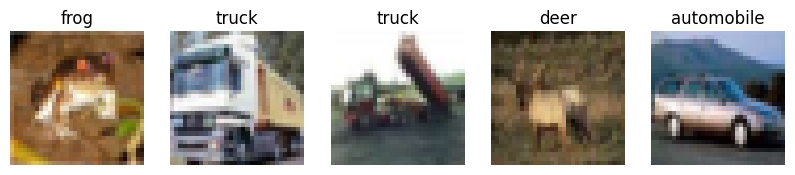

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

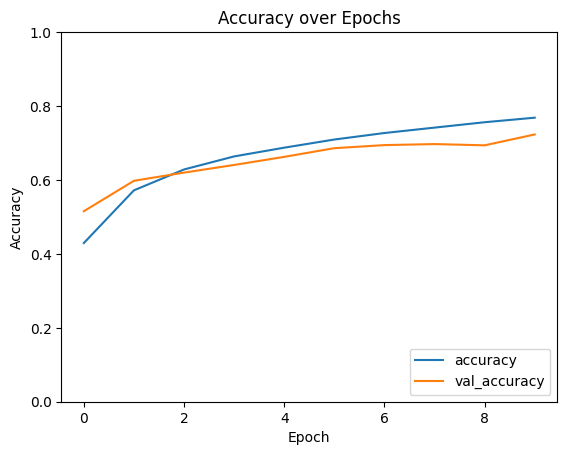

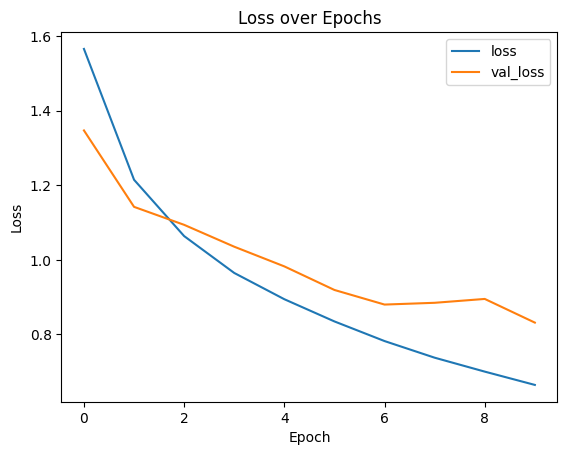

313/313 [==============================] - 2s 6ms/step


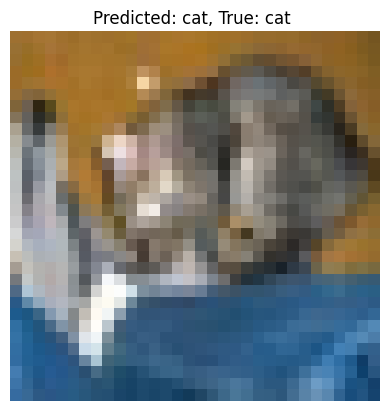

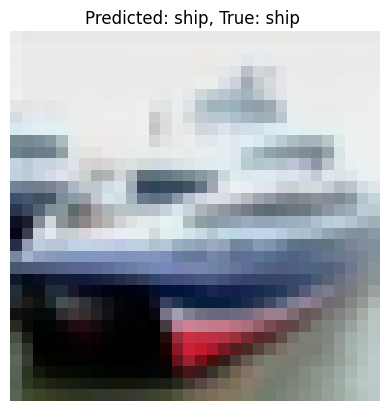

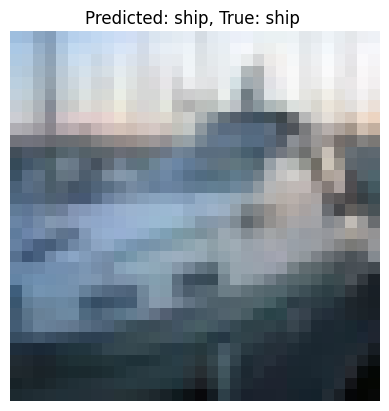

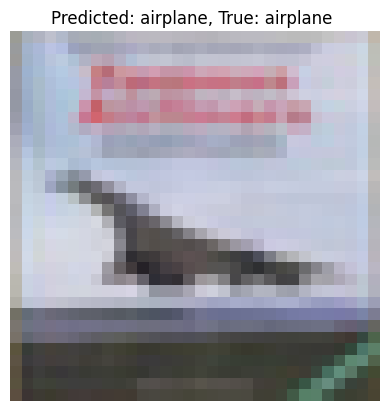

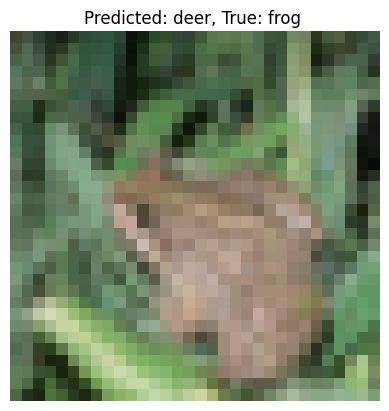

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# 设置 GPU 持久化模式，避免每次都重新加载
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# CIFAR-10 数据集加载
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# 数据归一化：将图像像素值缩放到 [0, 1] 范围
x_train, x_test = x_train / 255.0, x_test / 255.0

# 类别标签转换为独热编码格式
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 查看数据集的部分内容
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 显示前 5 张图像及其标签
def plot_images(images, labels, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis('off')
    plt.show()

plot_images(x_train, y_train, class_names)

# CNN 模型定义
model = models.Sequential([
    # 第一层卷积层 + 池化层
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # 第二层卷积层 + 池化层
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # 第三层卷积层 + 池化层
    layers.Conv2D(64, (3, 3), activation='relu'),

    # 展平层
    layers.Flatten(),
    
    # 全连接层
    layers.Dense(64, activation='relu'),
    
    # 输出层：使用 softmax 激活函数进行多类分类
    layers.Dense(10, activation='softmax')
])

# 模型编译
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 打印模型概况
model.summary()

# 训练模型
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# 评估模型
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

# 绘制训练过程中的准确率和损失值曲线
def plot_history(history):
    # 准确率曲线
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.title('Accuracy over Epochs')
    plt.show()

    # 损失曲线
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title('Loss over Epochs')
    plt.show()

plot_history(history)

# 使用模型对测试集进行预测
predictions = model.predict(x_test)

# 打印前五张图像的预测结果
def print_predictions(predictions, class_names):
    for i in range(5):
        plt.imshow(x_test[i])
        plt.title(f"Predicted: {class_names[np.argmax(predictions[i])]}, True: {class_names[np.argmax(y_test[i])]} ")
        plt.axis('off')
        plt.show()

print_predictions(predictions, class_names)


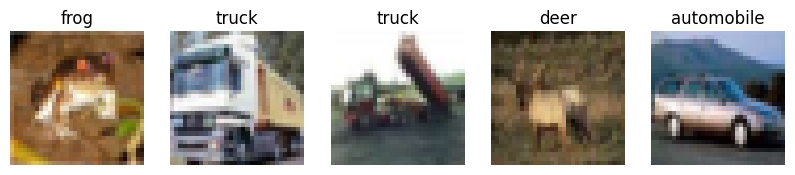

ValueError: Graph disconnected: cannot obtain value for tensor KerasTensor(type_spec=TensorSpec(shape=(None, 32, 32, 32), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'") at layer "concatenate". The following previous layers were accessed without issue: ['conv2d_3', 'batch_normalization', 're_lu', 'conv2d_4', 'batch_normalization_1', 're_lu_1', 'conv2d_5', 'batch_normalization_2', 're_lu_2']

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

# 设置GPU内存自适应分配
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# CIFAR-10 数据集加载
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 数据归一化：将图像像素值缩放到 [0, 1] 范围
x_train, x_test = x_train / 255.0, x_test / 255.0

# 类别标签转换为独热编码格式
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 查看数据集的部分内容
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 显示前 5 张图像及其标签
def plot_images(images, labels, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis('off')
    plt.show()

plot_images(x_train, y_train, class_names)
def densenet_block(x, num_filters, growth_rate):
    # Bottleneck层 (1x1卷积)
    x = layers.Conv2D(num_filters, (1, 1), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    
    # Dense层 (3x3卷积)
    x = layers.Conv2D(growth_rate, (3, 3), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    
    # 合并输入和输出（Dense连接）
    return layers.concatenate([x, layers.Input(shape=x.shape[1:])], axis=-1)

def build_densenet(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)

    # 初始卷积层
    x = layers.Conv2D(64, (3, 3), padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # DenseNet块
    x = densenet_block(x, 64, 32)
    x = densenet_block(x, 96, 32)
    x = densenet_block(x, 128, 32)

    # Global Average Pooling层
    x = layers.GlobalAveragePooling2D()(x)

    # 全连接层
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    # 输出层
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

# 构建 DenseNet 模型
model = build_densenet()
model.summary()
# 编译模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 训练模型
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# 评估模型
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

# 可视化训练过程中的准确率和损失值
def plot_history(history):
    # 准确率曲线
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.title('Accuracy over Epochs')
    plt.show()

    # 损失曲线
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title('Loss over Epochs')
    plt.show()

plot_history(history)

# 使用模型对测试集进行预测
predictions = model.predict(x_test)

# 打印前五张图像的预测结果
def print_predictions(predictions, class_names):
    for i in range(5):
        plt.imshow(x_test[i])
        plt.title(f"Predicted: {class_names[np.argmax(predictions[i])]}, True: {class_names[np.argmax(y_test[i])]} ")
        plt.axis('off')
        plt.show()

print_predictions(predictions, class_names)


Epoch 1/30
625/625 [==============================] - 17s 26ms/step - loss: 1.7162 - accuracy: 0.3676 - val_loss: 1.4500 - val_accuracy: 0.4854
Epoch 2/30
625/625 [==============================] - 16s 25ms/step - loss: 1.4327 - accuracy: 0.4848 - val_loss: 1.2134 - val_accuracy: 0.5690
Epoch 3/30
625/625 [==============================] - 16s 25ms/step - loss: 1.3141 - accuracy: 0.5329 - val_loss: 1.1825 - val_accuracy: 0.5849
Epoch 4/30
625/625 [==============================] - 16s 25ms/step - loss: 1.2273 - accuracy: 0.5647 - val_loss: 1.0748 - val_accuracy: 0.6140
Epoch 5/30
625/625 [==============================] - 16s 26ms/step - loss: 1.1672 - accuracy: 0.5885 - val_loss: 1.0699 - val_accuracy: 0.6281
Epoch 6/30
625/625 [==============================] - 21s 34ms/step - loss: 1.1178 - accuracy: 0.6098 - val_loss: 1.0365 - val_accuracy: 0.6439
Epoch 7/30
625/625 [==============================] - 24s 38ms/step - loss: 1.0781 - accuracy: 0.6236 - val_loss: 0.9860 - val_accuracy:

d:\anaconda3\envs\tf_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20934 (\N{CJK UNIFIED IDEOGRAPH-51C6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda3\envs\tf_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30830 (\N{CJK UNIFIED IDEOGRAPH-786E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda3\envs\tf_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda3\envs\tf_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda3\envs\tf_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from current font.
  fig.canvas.print_figure(bytes_

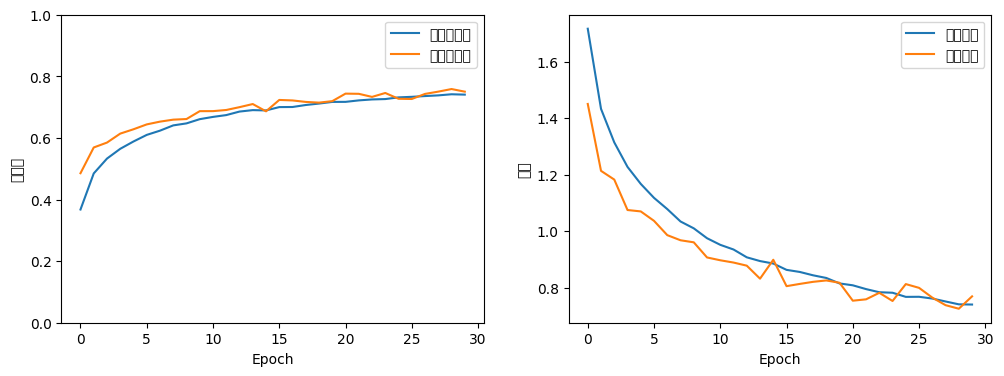

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 加载CIFAR-10数据集
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# 数据预处理：归一化像素值到[0,1]区间
train_images, test_images = train_images / 255.0, test_images / 255.0

# 将训练集划分为训练集和验证集（80%训练，20%验证）
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

# 数据增强层：在模型中直接集成数据增强
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),  # 随机水平翻转
    layers.experimental.preprocessing.RandomRotation(0.1),       # 随机旋转（±10%）
])

# 构建CNN模型
model = models.Sequential([
    data_augmentation,  # 数据增强
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # 减少过拟合
    layers.Dense(10)  
])

# 编译模型
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 训练模型
history = model.fit(train_images, train_labels, epochs=30,
                    validation_data=(val_images, val_labels),
                    batch_size=64)

# 在测试集上评估模型
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"测试准确率: {test_acc}")

# 生成分类报告
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(test_labels, y_pred_classes))

# 绘制训练曲线
plt.figure(figsize=(12, 4))

# 准确率曲线
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='训练准确率')
plt.plot(history.history['val_accuracy'], label='验证准确率')
plt.xlabel('Epoch')
plt.ylabel('准确率')
plt.ylim([0, 1])
plt.legend()

# 损失曲线
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='训练损失')
plt.plot(history.history['val_loss'], label='验证损失')
plt.xlabel('Epoch')
plt.ylabel('损失')
plt.legend()

plt.show()